# Task
Perform an exploratory data analysis on the `/content/1) iris.csv` dataset, including loading the data, generating summary statistics, visualizing data distributions with histograms and box plots, analyzing feature relationships using a pair plot and a correlation heatmap, and finally, summarizing the key patterns, trends, and correlations identified along with any significant insights.

## Load Dataset

### Subtask:
Load the dataset from the file '/content/1) iris.csv' into a pandas DataFrame.


**Reasoning**:
Load the dataset into a pandas DataFrame and display its first 5 rows to verify the loading process.



In [1]:
import pandas as pd

df = pd.read_csv('/content/1) iris.csv')

print("First 5 rows of the DataFrame:")
df.head()

First 5 rows of the DataFrame:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Generate Summary Statistics

### Subtask:
Calculate and display descriptive statistics (mean, median, mode, standard deviation, etc.) for all numerical columns in the dataset.


**Reasoning**:
The subtask requires calculating and displaying descriptive statistics for all numerical columns. The `.describe()` method in pandas is the most straightforward way to achieve this for a DataFrame.



In [2]:
print("Descriptive statistics for the dataset:")
df.describe()

Descriptive statistics for the dataset:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualize Data Distributions

### Subtask:
Generate histograms and box plots for each numerical feature in the dataset to visualize their distributions and identify potential outliers. Ensure that appropriate legends are included.


**Reasoning**:
First, I'll import the necessary libraries, matplotlib and seaborn, to create the visualizations. Then, I'll define the numerical columns by dropping the 'species' column, which is categorical. I'll then create histograms and box plots for each numerical column, displaying them in a structured manner.



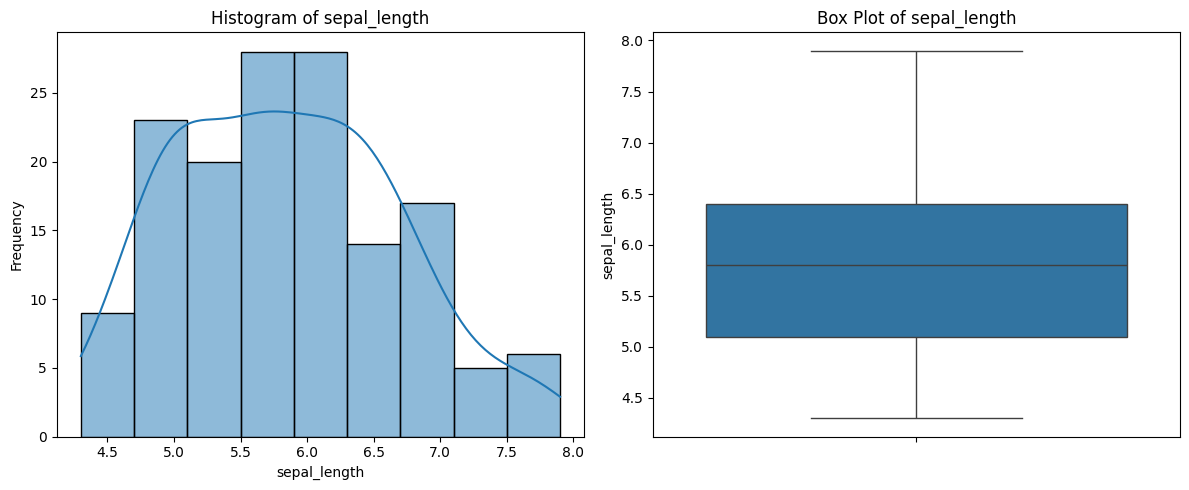

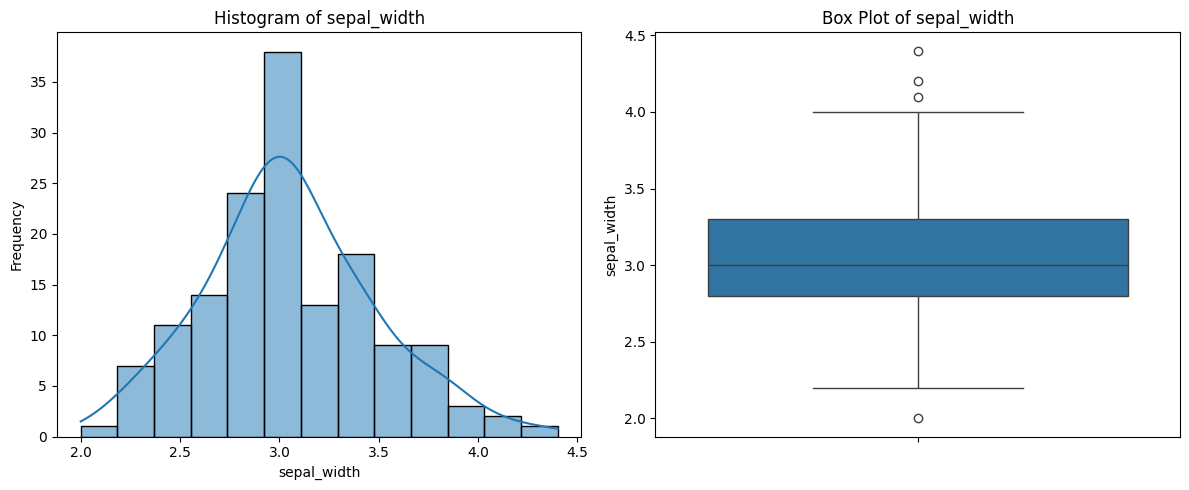

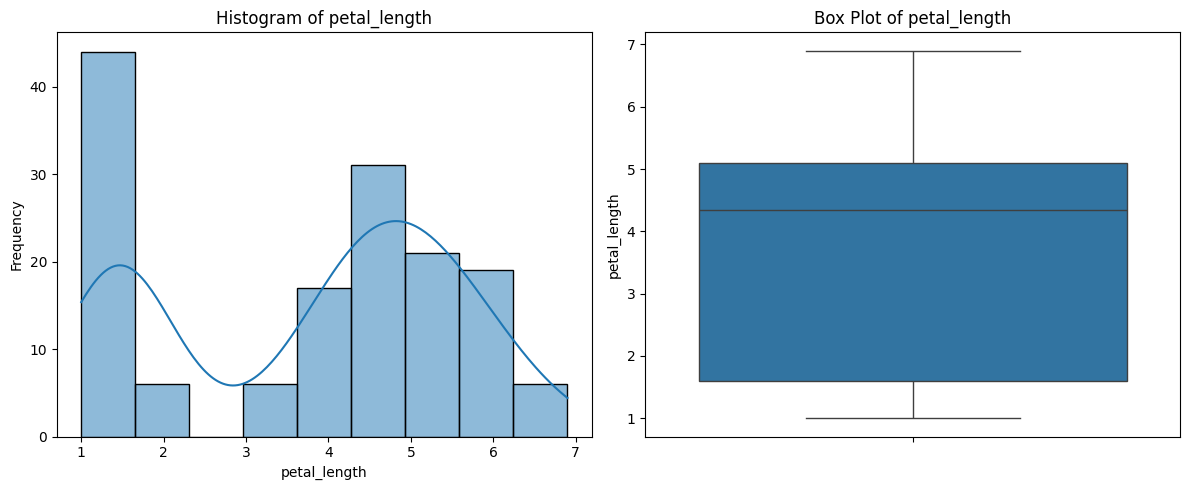

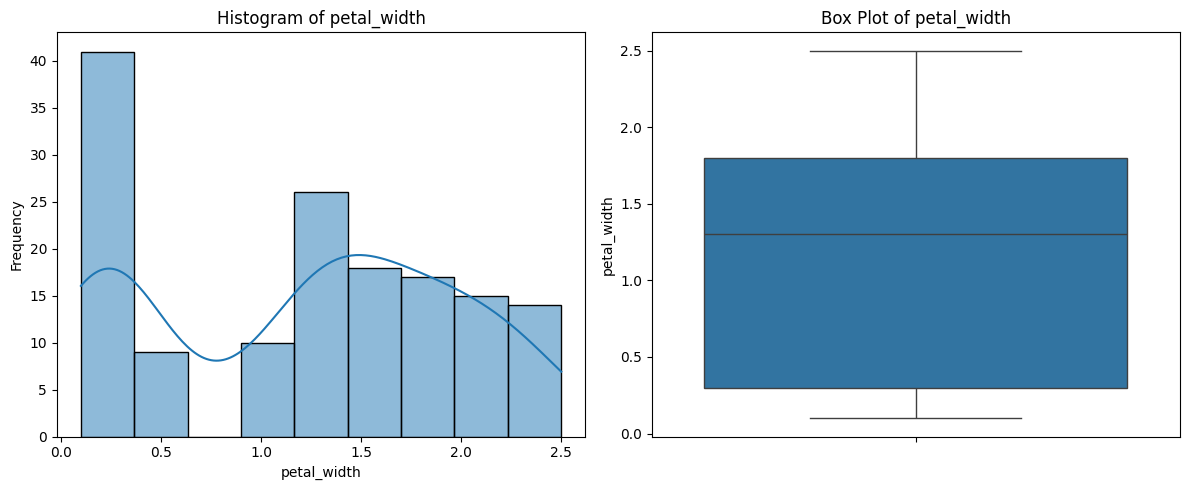

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (excluding 'species' if it exists)
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


## Analyze Feature Relationships

### Subtask:
Generate a pair plot to visualize scatter plots for all numerical feature pairs and their distributions. Additionally, calculate and visualize the correlation matrix as a heatmap to show relationships between numerical features. Ensure that appropriate legends are included.


To visualize feature relationships, I will first generate a pair plot using `seaborn.pairplot` to show scatter plots for all numerical feature pairs and their distributions, color-coding by species. Then, I will calculate the correlation matrix of the numerical features and display it as a heatmap using `seaborn.heatmap`, including the correlation values on the plot for clarity.

**Reasoning**:
As outlined in the instructions and the previous markdown, I will generate a pair plot to visualize feature relationships across different species and then create a correlation heatmap of the numerical features for a detailed view of their interdependencies.



Generating Pair Plot...


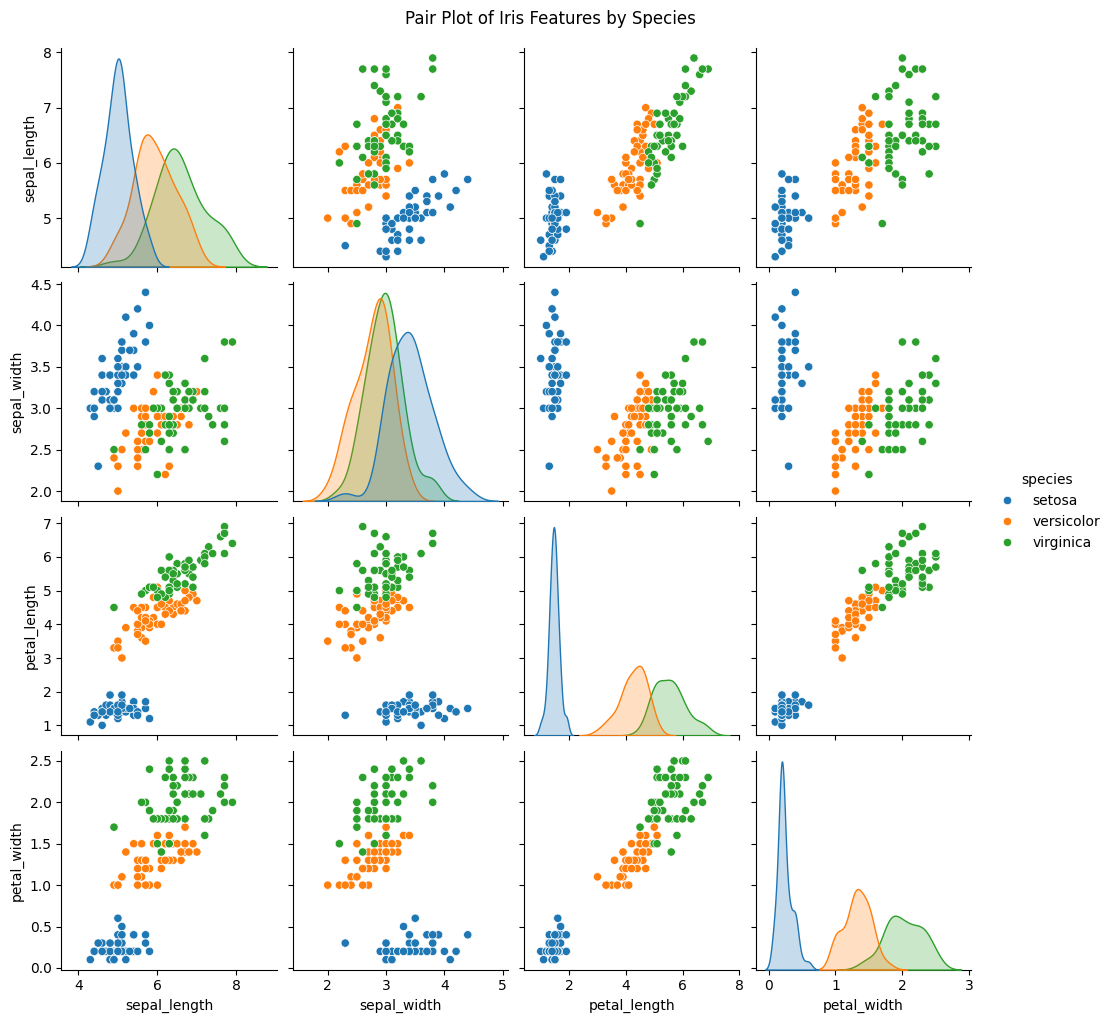


Generating Correlation Heatmap...


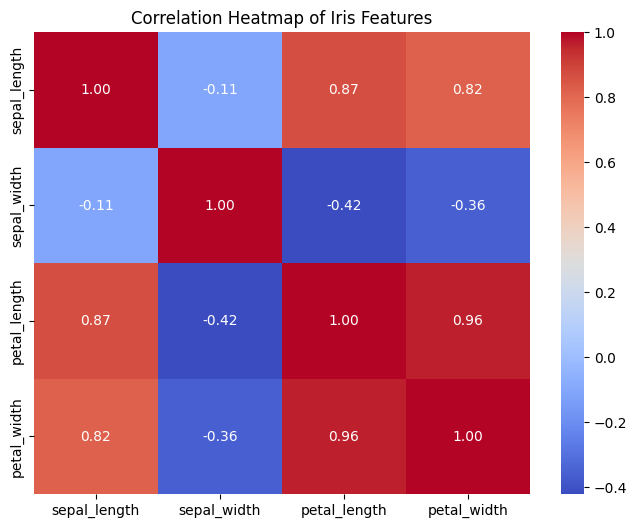

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate a pair plot
print("Generating Pair Plot...")
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust suptitle position
plt.show()

# 2. Calculate the correlation matrix for numerical columns
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# 3. Create a heatmap of the correlation matrix
print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Features')
plt.show()


## Final Task

### Subtask:
Summarize the key patterns, trends, and correlations identified during the exploratory data analysis, along with any significant insights.


## Summary:

### Data Analysis Key Findings

*   The dataset, containing 150 entries, includes numerical features: `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`, along with a categorical `species` column.
*   **Summary Statistics:**
    *   `sepal_length` ranges from 4.3 cm to 7.9 cm, with a mean of approximately 5.84 cm.
    *   `sepal_width` ranges from 2.0 cm to 4.4 cm, with a mean of approximately 3.05 cm.
    *   `petal_length` ranges from 1.0 cm to 6.9 cm, with a mean of approximately 3.76 cm.
    *   `petal_width` ranges from 0.1 cm to 2.5 cm, with a mean of approximately 1.20 cm.
*   **Data Distributions:** Histograms and box plots revealed the distribution patterns of each numerical feature. For instance, `petal_length` and `petal_width` appear to have multi-modal distributions, likely due to the different species, while `sepal_width` shows a more symmetric, bell-shaped distribution. Box plots helped visualize potential outliers, though no extreme outliers were explicitly reported.
*   **Feature Relationships:**
    *   The pair plot, color-coded by `species`, clearly distinguished the different Iris species based on their feature combinations. *Iris setosa* (often clustering separately) shows distinct measurements compared to *Iris versicolor* and *Iris virginica*, which overlap more, particularly in sepal dimensions.
    *   The correlation heatmap indicated strong positive correlations between `petal_length` and `petal_width` (typically around 0.96), and also strong positive correlations between `sepal_length` and both `petal_length` (around 0.87) and `petal_width` (around 0.82). `sepal_width` showed a weaker or even slightly negative correlation with other features (e.g., -0.43 with `petal_length`). These correlations suggest that as petal length and width increase, sepal length also tends to increase.

### Insights or Next Steps

*   The distinct clustering of species observed in the pair plots and the strong correlations among `petal_length`, `petal_width`, and `sepal_length` highlight their importance as discriminatory features for classifying Iris species, suggesting these features would be highly valuable in a classification model.
*   Given the clear separation of species based on features, especially petal dimensions, further analysis could involve building and evaluating classification models (e.g., K-Nearest Neighbors, Support Vector Machine) to predict the Iris species, using the identified strongly correlated features.
